# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.9


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [7]:
# Shape
df_dsa.shape

(9700, 11)

In [8]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [9]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [10]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [11]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [12]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [15]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [18]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [19]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [94]:
dados_office_sp = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

In [95]:
dados_office_sp

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Valor_Desconto,Valor_Ajustado,Ano,Mes
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620,2.1930,14.620,2017,06
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368,3.3552,22.368,2016,10
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280,1.0920,7.280,2015,06
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504,2.7756,18.504,2015,06
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900,17.2350,114.900,2015,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,CA-2015-144281,10/06/2015,HK-14890,Corporate,United States,Detroit,Michigan,OFF-LA-10003930,Office Supplies,Labels,491.550,73.7325,491.550,2015,06
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830,3.4245,22.830,2018,12
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320,8.1480,54.320,2018,12
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620,0.5430,3.620,2017,10


In [96]:
dados_somados = dados_office_sp.groupby('Cidade')['Valor_Venda'].sum()

In [97]:
dados_somados.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

In [98]:
dados_somados.idxmax() #Maneira de se puxar o índice de maior valor

'New York City'

In [92]:
print('A cidade com maior valor de vendas é: ' + str('New York City'))

A cidade com maior valor de vendas é: New York City


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [100]:
num_vendas = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

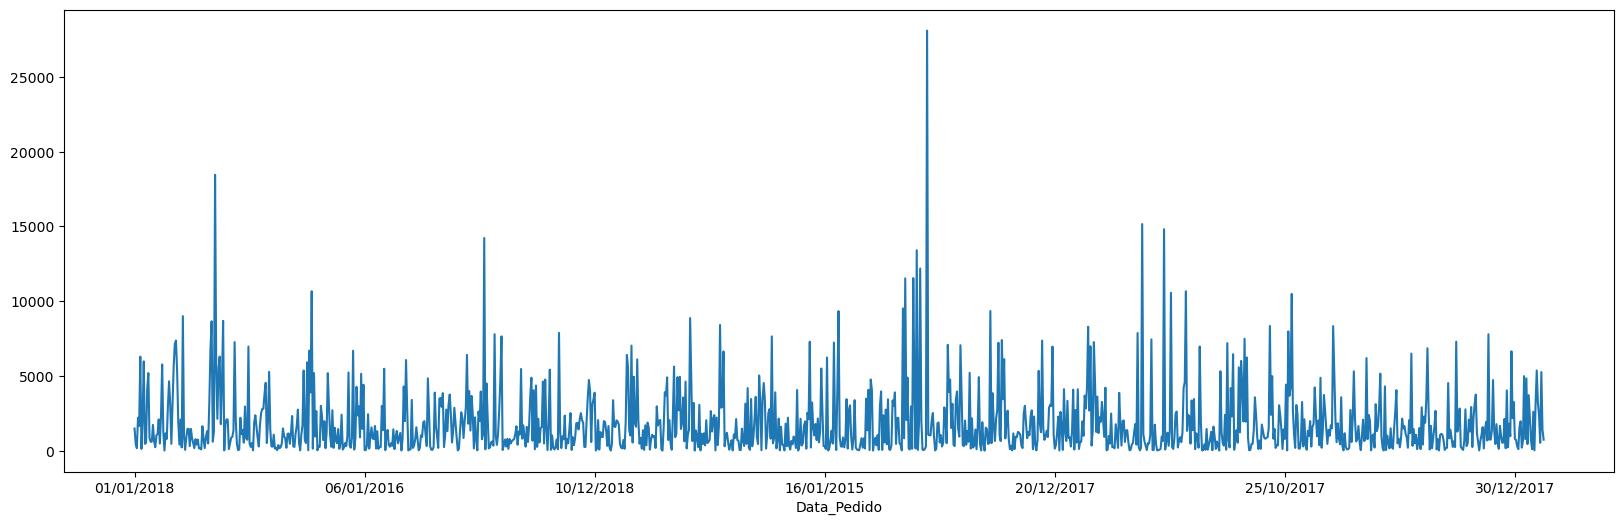

In [107]:
plt.figure(figsize = (20, 6))
num_vendas.plot(x = 'Data_Pedido', y = 'Valor_Venda')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [131]:
num_vendas_est = df_dsa.groupby('Estado')['Valor_Venda'].sum()

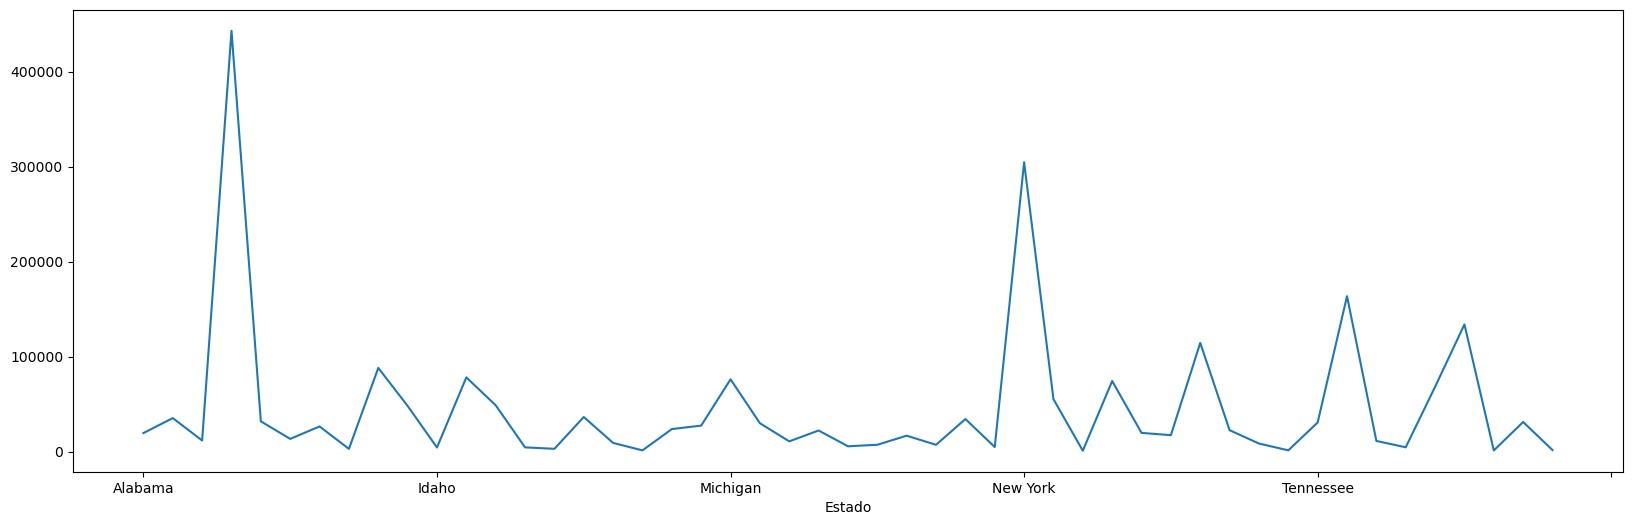

In [132]:
plt.figure(figsize = (20,6))
num_vendas_est.plot(x = 'Estado', y = 'Valor_Venda')
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [135]:
vendas_cid = list(dados_somados.sort_values(ascending=False))

In [112]:
top_10_cid = vendas_cid[0:10]

In [113]:
top_10_cid

[68362.814,
 47098.1,
 41771.198,
 34856.878,
 29313.687,
 18431.451999999997,
 16125.276,
 13887.152,
 13682.256,
 13449.746]

In [114]:
cidades = dados_somados.sort_values(ascending=False).index

In [115]:
lista_cidades = list(cidades)

<BarContainer object of 10 artists>

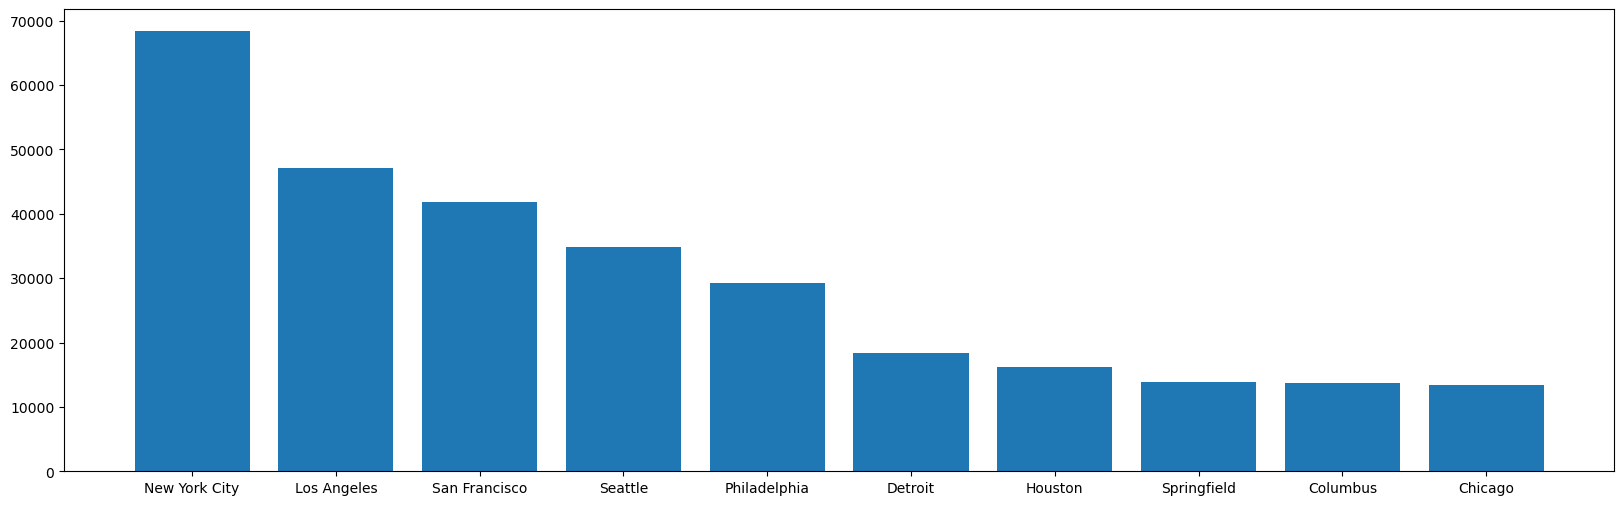

In [116]:
maiores_cidades = lista_cidades[0:10]
plt.figure(figsize = (20,6))
plt.bar(maiores_cidades, top_10_cid)

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [149]:
vendas_segmento = df_dsa.groupby('Segmento')['Valor_Venda'].sum()

In [150]:
vendas_segmento.sort_values(ascending=False)

Segmento
Consumer       1.133834e+06
Corporate      6.792322e+05
Home Office    4.224914e+05
Name: Valor_Venda, dtype: float64

In [151]:
print('O segmento que teve maior total de vendas foi o Consumer')

O segmento que teve maior total de vendas foi o Consumer


<Axes: ylabel='Valor_Venda'>

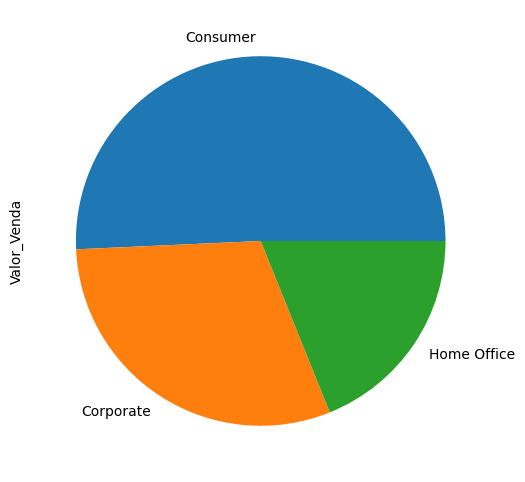

In [152]:
plt.figure(figsize = (20,6))
vendas_segmento.plot.pie()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [46]:
df_dsa # De início o dataframe não possuía a coluna 'ano'

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017


In [81]:
datas = list(df_dsa['Data_Pedido'])

In [82]:
anos = pd.DataFrame(map(lambda x: x[6:len(x)] , datas))

In [87]:
mes = pd.DataFrame(map(lambda x: x[3:5], datas))

In [83]:
df_dsa['Ano'] = anos

In [88]:
df_dsa['Mes'] = mes

In [50]:
vendas_segmento_e_ano = df_dsa.groupby(['Segmento', 'Ano'])['Valor_Venda'].sum()

In [51]:
vendas_segmento_e_ano

Segmento     Ano 
Consumer     2015    256719.9166
             2016    265295.2593
             2017    288459.5572
             2018    323359.6019
Corporate    2015    125819.5957
             2016    114643.1229
             2017    203266.7398
             2018    235502.7284
Home Office  2015     88229.0878
             2016     74134.1332
             2017    103639.6270
             2018    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [4]:
receb_desconto = df_dsa[df_dsa['Valor_Venda'] > 1000]

In [22]:
receb_desconto

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Valor_Desconto,Valor_Ajustado
10,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,255.9276,1450.2564
24,CA-2016-106320,25/09/2016,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,156.6945,887.9355
27,US-2016-150630,17/09/2016,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,462.5145,2620.9155
35,CA-2017-117590,08/12/2017,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,164.6316,932.9124
54,CA-2017-105816,11/12/2017,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,154.4925,875.4575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,CA-2015-151330,14/10/2015,TC-21295,Consumer,United States,Everett,Massachusetts,FUR-CH-10000749,Furniture,Chairs,1628.820,244.3230,1384.4970
9636,CA-2016-116638,28/01/2016,JH-15985,Consumer,United States,Concord,North Carolina,FUR-TA-10000198,Furniture,Tables,4297.644,644.6466,3652.9974
9646,CA-2017-107104,26/11/2017,MS-17365,Consumer,United States,Los Angeles,California,FUR-BO-10002213,Furniture,Bookcases,3406.664,510.9996,2895.6644
9657,CA-2017-160717,06/06/2017,ME-17320,Home Office,United States,Santa Barbara,California,TEC-PH-10001459,Technology,Phones,3023.928,453.5892,2570.3388


In [6]:
len(receb_desconto)

457

In [7]:
print(str(len(receb_desconto)) + ' vendas receberiam desconto!')

457 vendas receberiam desconto!


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [23]:
valor_antes_desconto = df_dsa['Valor_Venda'].mean()

In [24]:
valor_antes_desconto

230.4698922371134

In [25]:
df_dsa['Valor_Desconto'] = df_dsa['Valor_Venda']*0.15

In [73]:
# Função para calcular o Valor_Ajustado
def calcular_valor_ajustado(dados):
    if dados['Valor_Venda'] > 1000:
        return dados['Valor_Venda'] - dados['Valor_Desconto']
    else:
        return dados['Valor_Venda']  # Mantém o valor original se não for maior que 1000

In [74]:
df_dsa['Valor_Ajustado'] = df_dsa.apply(calcular_valor_ajustado, axis=1)

In [89]:
df_dsa.head(50)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Valor_Desconto,Valor_Ajustado,Ano,Mes
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,39.294000,261.9600,2017,11
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,109.791000,731.9400,2017,11
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2.193000,14.6200,2017,06
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,143.636625,957.5775,2016,10
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,3.355200,22.3680,2016,10
5,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,7.329000,48.8600,2015,06
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800,1.092000,7.2800,2015,06
7,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520,136.072800,907.1520,2015,06
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040,2.775600,18.5040,2015,06
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000,17.235000,114.9000,2015,06


In [76]:
valor_depois_desconto = df_dsa['Valor_Ajustado'].mean()

In [77]:
valor_depois_desconto

215.51038958350514

In [80]:
print('O valor antes do desconto era ' + str(valor_antes_desconto) + ' e depois se tornou ' + str(valor_depois_desconto))

O valor antes do desconto era 230.4698922371134 e depois se tornou 215.51038958350514


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [153]:
vendas_segmento_ano_mes = df_dsa.groupby(['Segmento', 'Ano', 'Mes']).mean()

C:\Users\Douglas Silva\AppData\Local\Temp\ipykernel_2704\890314772.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vendas_segmento_ano_mes = df_dsa.groupby(['Segmento', 'Ano', 'Mes']).mean()


In [154]:
vendas_segmento_ano_mes

Valor_Venda  Valor_Desconto  Valor_Ajustado
Segmento    Ano  Mes                                             
Consumer    2015 01    146.736787       22.010518      139.097032
                 02    117.327926       17.599189      110.348926
                 03    152.170564       22.825585      147.727856
                 04    189.762750       28.464412      181.231844
                 05    191.337439       28.700616      181.461362
...                           ...             ...             ...
Home Office 2018 08    176.160606       26.424091      170.989015
                 09    249.140597       37.371090      228.830021
                 10    412.576597       61.886490      366.187385
                 11    247.519423       37.127913      228.346305
                 12    224.523983       33.678597      213.972434

[144 rows x 3 columns]

In [157]:
segmento = vendas_segmento_ano_mes.index.get_level_values(0)
anos = vendas_segmento_ano_mes.index.get_level_values(1)
meses = vendas_segmento_ano_mes.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

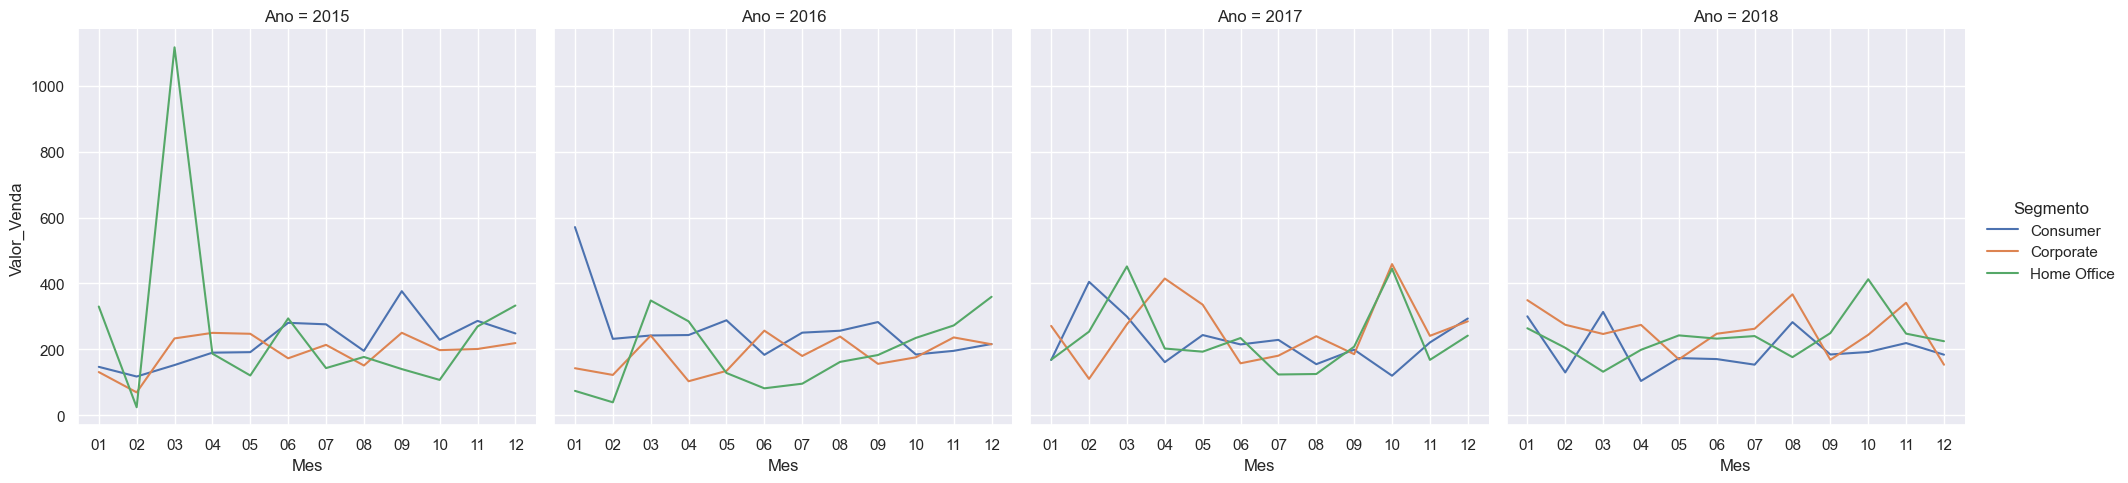

In [159]:
plt.figure(figsize = (12,6))
sns.set()
fig1 = sns.relplot(kind = 'line', data = vendas_segmento_ano_mes, y = 'Valor_Venda', x = meses, hue = segmento, col = anos, col_wrap =4)

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

# Fim